In this assignment, you are required to implement functions to calculate the listed performance measures below from scratch. **YOU CAN USE NUMPY FOR CALCULATIONS AND MATPLOTLIB FOR VISUALIZATION. DON'T USE ANY OTHER PACKAGE**.

* Accuracy
* Confusion matrix
* Percision
* Recall
* F1 score
* AUC of ROC


You're also required to implement functions to display the following
* Confusion matrix
* Percision VS Recall curve
* ROC curve

After finishing the assignment, please run all cells then save the notebook as PDF and attach the PDF to the original notebook in the email.



In [1]:
# DON'T CHANGE THIS
# DON'T CHANGE THIS
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

y = np.random.randint(2, size=(100, 1))                # Generating random labels
y_predication = np.random.uniform(0, 1, size=(100, 1)) # Generating random predictions

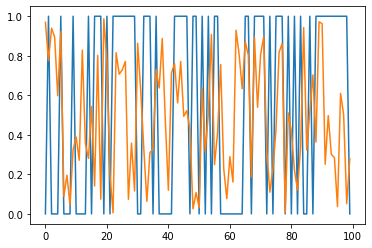

In [2]:
# DON'T CHANGE THIS
import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(y_predication)


In [3]:
def Confusion_matrix(y, y_predication, threshold = 0.5):
    false_positive = 0
    false_negative = 0
    true_positive  = 0
    true_negative  = 0
    
    for i, j in zip(y, y_predication):
        if(j >= threshold):
            j = 1
        else:
            j = 0
        if i == j:
            if j == 1:
                true_positive += 1
            else:
                true_negative += 1
        else:
            if j == 1:
                false_positive += 1
            else :
                false_negative += 1
    return [true_negative, false_positive], [false_negative, true_positive]

In [4]:
confusion = Confusion_matrix(y, y_predication)
print(confusion)

([25, 19], [27, 29])


In [5]:
Accuracy = (confusion[0][0]+confusion[1][1]) / (confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1])
print(Accuracy)

0.54


In [6]:
Percision = confusion[1][1] / (confusion[1][1] + confusion[0][1])
print(Percision)

0.6041666666666666


In [7]:
Recall = confusion[1][1] / (confusion[1][1] + confusion[1][0])
print(Recall)

0.5178571428571429


In [8]:
F1_score = 2 * (Percision * Recall) / (Percision + Recall)
print(F1_score)

0.5576923076923077


In [9]:
def PercisionVSRecall(y, y_predication):
    percision=[]
    recall = []
    threshold =np.linspace(0, 1, 1000)
    
    for i in threshold:
        confusion = Confusion_matrix(y, y_predication, i)
        Percision = confusion[1][1] / (confusion[1][1] + confusion[0][1] + 1.e-1 )
        Recall = confusion[1][1] / (confusion[1][1] + confusion[1][0])
        percision.append(Percision)
        recall.append(Recall)
        
    return recall, percision 
    

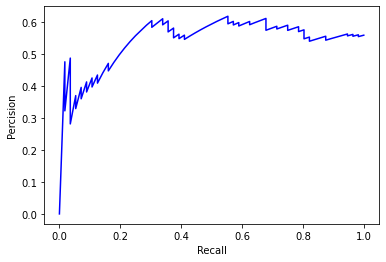

In [10]:
rec, per = PercisionVSRecall(y, y_predication)
plt.plot(rec, per, 'b-')
plt.xlabel('Recall')
plt.ylabel('Percision')
plt.show()

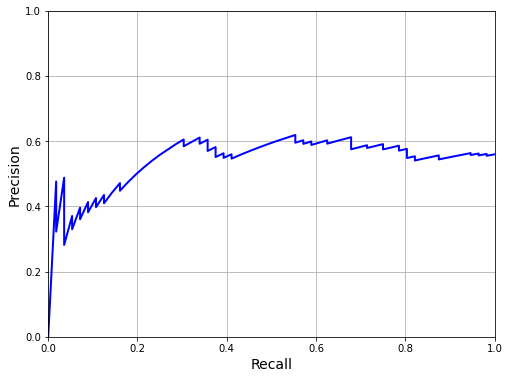

In [11]:
def plot_precision_vs_recall(recalls, precisions):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(rec, per)
plt.show()

In [12]:
def ROC(y,ypred):
    true_positive_rate=[]
    false_positive_rate=[]
    t, f = 0, 0
    threshold =np.linspace(0, 1, 1000)
    
    for i in threshold:
        confusion = Confusion_matrix(y, y_predication, i)
        true_positive_rate.append(confusion[1][1] / (confusion[1][0] + confusion[1][1] + 1.e-1))
        false_positive_rate.append(confusion[0][1] / (confusion[0][1] + confusion[0][0] + 1.e-1))

    return true_positive_rate, false_positive_rate

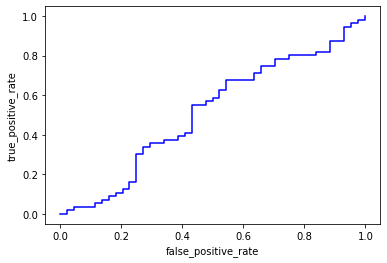

In [13]:
true_rate, false_rate = ROC(y, y_predication)
plt.plot(false_rate, true_rate, 'b-')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

In [14]:
AUC = -1 * np.trapz(true_rate, false_rate)
print('Area under curve', AUC)

Area under curve 0.5101030311114344
